In [1]:
import os
import gpxpy.gpx
import pandas as pd
import ggps
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
from fitparse import FitFile

In [4]:
name = 'KM_Strava'
root = f'../data/{name}/activities/'

In [5]:
fit_files = [x for x in os.listdir(root) if x.endswith(".fit.gz")]
gpx_files = [x for x in os.listdir(root) if x.endswith(".gpx")]
tcx_files = [x for x in os.listdir(root) if x.endswith(".tcx")]


In [6]:
fit_files[0]

'2330307010.fit.gz'

In [7]:
def semicir_to_degs(semicirc):
    return semicirc * (180 / 2**31)

def read_fitfile(filename):
    try:
        fitfile = FitFile(gzip.open(filename))
        df = pd.DataFrame([{d['name']: d['value'] for d in r.as_dict()['fields']} 
                                   for r in fitfile.get_messages('record')])
        df['position_lat'] = df['position_lat'].map(semicir_to_degs)
        df['position_long'] = df['position_long'].map(semicir_to_degs)
        df.set_index("timestamp", inplace=True)
        return df
    except Exception as e:
        print(e)

In [8]:
act = read_fitfile(root + fit_files[0])

In [9]:
act.head()

,enhanced_altitude,altitude,temperature,enhanced_speed,speed,vertical_speed,distance,position_lat,position_long
timestamp,,,,,,,,,
2019-02-08 02:28:45,2772.0,2772.0,30.0,1.95,1.95,0.03,NaN,NaN,NaN
2019-02-08 02:28:46,2772.0,2772.0,30.0,2.25,2.25,0.03,10.0,NaN,NaN
2019-02-08 02:28:47,2771.0,2771.0,30.0,2.40,2.40,0.03,16.0,39.569801,-106.097933
2019-02-08 02:28:48,2771.0,2771.0,30.0,2.60,2.60,0.03,21.0,NaN,NaN
2019-02-08 02:28:49,2771.0,2771.0,30.0,2.80,2.80,0.03,NaN,39.569763,-106.097983


In [11]:
act.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1691 entries, 2019-02-08 02:28:45 to 2019-02-08 02:59:01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   enhanced_altitude  1644 non-null   float64
 1   altitude           1644 non-null   float64
 2   temperature        1644 non-null   float64
 3   enhanced_speed     1644 non-null   float64
 4   speed              1644 non-null   float64
 5   vertical_speed     1644 non-null   float64
 6   distance           535 non-null    float64
 7   position_lat       539 non-null    float64
 8   position_long      539 non-null    float64
dtypes: float64(9)
memory usage: 132.1 KB


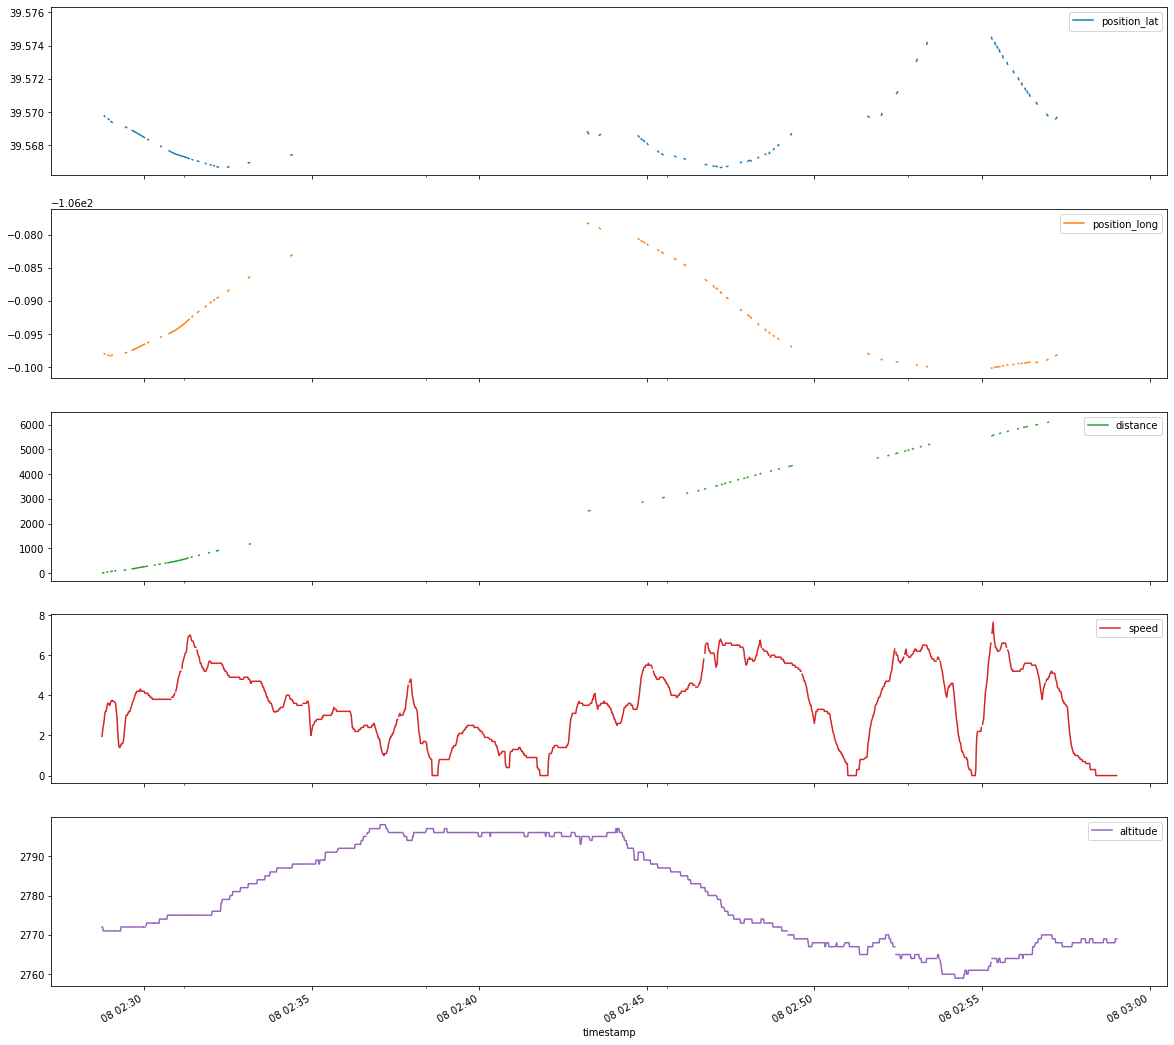

In [12]:
_ = act[['position_lat', 
                'position_long','distance', 'speed', 'altitude']].plot(figsize=(20,20), subplots=True)



In [16]:
df = pd.read_csv(f'../data/{name}/activities.csv')
parsed_activities = df.iloc[:,(df.isnull().sum(axis = 0) <= 500).values].set_index('Activity Date')

In [17]:
parsed_activities[parsed_activities.Filename==f"activities/{fit_files[0]}"]

,Activity ID,Activity Name,Activity Type,Elapsed Time,Distance,Commute,Filename,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Elevation Gain,Elevation Low,Elevation High,Max Grade,Average Grade,Commute.1
Activity Date,,,,,,,,,,,,,,,,,
"Feb 8, 2019, 2:28:45 AM",2186666062,Evening Ride,Ride,1816,6.19,False,activities/2330307010.fit.gz,1816.0,1662,6193.0,8.6,54.0,2759.0,2798.0,28.6,-0.048442,0.0


In [18]:
infile = root+gpx_files[0]
handler = ggps.GpxHandler()
handler.parse(infile)
trackpoints = handler.trackpoints
trackpoints

[{
   "elapsedtime": "00:00:00",
   "latitudedegrees": "39.4810350",
   "longitudedegrees": "-106.0677100",
   "seq": "1",
   "time": "2016-02-17T00:21:51Z",
   "type": "Trackpoint"
 },
 {
   "elapsedtime": "00:00:02",
   "latitudedegrees": "39.4810620",
   "longitudedegrees": "-106.0677380",
   "seq": "2",
   "time": "2016-02-17T00:21:53Z",
   "type": "Trackpoint"
 },
 {
   "elapsedtime": "00:00:06",
   "latitudedegrees": "39.4810320",
   "longitudedegrees": "-106.0677420",
   "seq": "3",
   "time": "2016-02-17T00:21:57Z",
   "type": "Trackpoint"
 },
 {
   "elapsedtime": "00:00:08",
   "latitudedegrees": "39.4809840",
   "longitudedegrees": "-106.0677220",
   "seq": "4",
   "time": "2016-02-17T00:21:59Z",
   "type": "Trackpoint"
 },
 {
   "elapsedtime": "00:00:09",
   "latitudedegrees": "39.4809500",
   "longitudedegrees": "-106.0677130",
   "seq": "5",
   "time": "2016-02-17T00:22:00Z",
   "type": "Trackpoint"
 },
 {
   "elapsedtime": "00:00:10",
   "latitudedegrees": "39.4809170",
 

In [19]:
tcx_files[0]
infile

'../data/KM_Strava/activities/495304095.gpx'

In [20]:
infile = root + tcx_files[0]
handler = ggps.TcxHandler()
handler.parse(infile)
trackpoints = handler.trackpoints

SAXParseException: ../data/KM_Strava/activities/735440112.tcx:1:10: XML or text declaration not at start of entity